In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statistics as stats

In [2]:
data=pd.read_csv(r"E:\data trained projects\bigdatamart_Train.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.apply(lambda data:len(data.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
categ_col=[]
for x in data.dtypes.index:
    if data.dtypes[x]=="object":
        categ_col.append(x)
categ_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
for col in categ_col:
    print()
    print(data[col].value_counts())
    print()


FDW13    10
FDG33    10
FDF56     9
FDD38     9
NCY18     9
         ..
FDK57     1
FDY43     1
FDQ60     1
FDE52     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Medi

In [10]:
data.Outlet_Establishment_Year.unique

<bound method Series.unique of 0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64>

In [11]:
data['Item_Weight']=data['Item_Weight'].fillna(0).replace(0,data['Item_Weight'].mean())

In [12]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
data.Item_Weight.isnull().sum()

0

In [14]:
outlet_size_mode=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
mis_val=data['Outlet_Size'].isnull()
data.loc[mis_val,'Outlet_Size']=data.loc[mis_val,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

In [16]:
data['Outlet_Size'].isnull().sum()

0

In [17]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
sum(data['Item_Visibility']==0)

526

In [19]:
data.loc[:,'Item_Visibility'].replace([0],[data['Item_Visibility'].mean()],inplace=True)

In [20]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
data['New_Item_Type']=data['Item_Identifier'].apply(lambda x: x[:2])
data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [22]:
data['New_Item_Type']=data['New_Item_Type'].replace({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [23]:
data.loc[data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [24]:
#create small value for establishment year
data['Outlet_Years']= 2013-data['Outlet_Establishment_Year']
data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [25]:
 data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

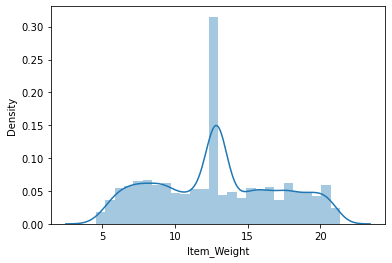

In [26]:
sns.distplot(data['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

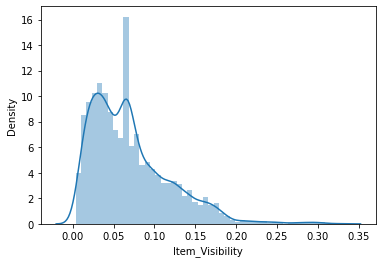

In [27]:
sns.distplot(data['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

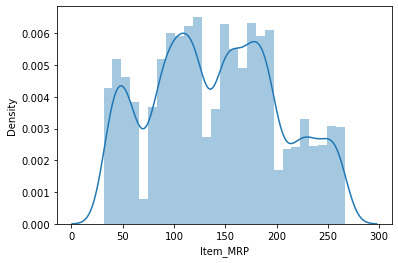

In [28]:
sns.distplot(data['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

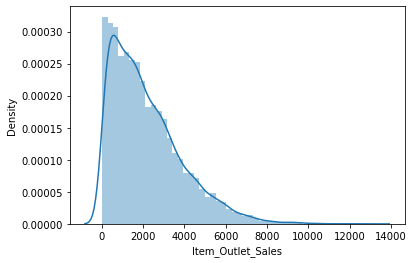

In [29]:
sns.distplot(data['Item_Outlet_Sales'])

In [30]:
# log transformation
data['Item_Outlet_Sales']=np.log(1+data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

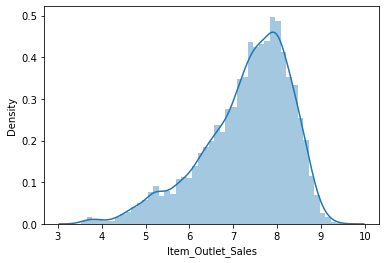

In [31]:
sns.distplot(data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

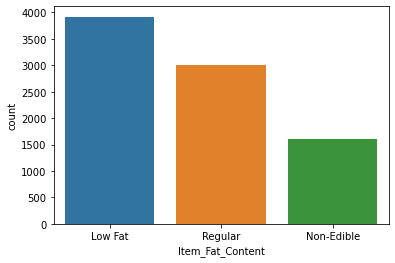

In [32]:
sns.countplot(data['Item_Fat_Content'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

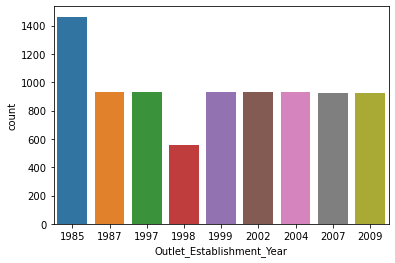

In [33]:
sns.countplot(data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

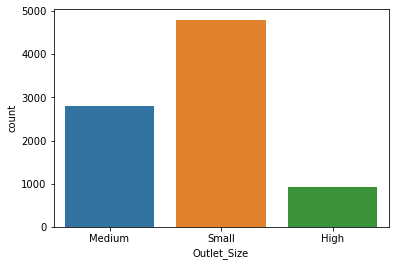

In [34]:
sns.countplot(data['Outlet_Size'])

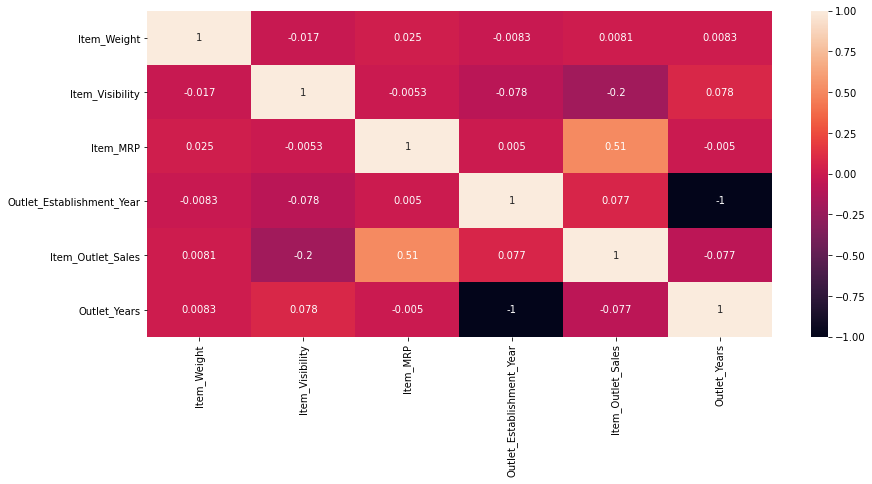

In [35]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


In [38]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


In [39]:
data.shape

(8523, 14)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [53]:
x=data.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Years'])
y=data['Item_Outlet_Sales']

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
lr_pred=lr.predict(x_test)

In [62]:
mean_squared_error(y_test,lr_pred)

7.415045700816198e-30

In [63]:
cross_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error').mean()
lr_cross_score=-cross_score
lr_cross_score

1.1267031892595937e-28

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
knn=KNeighborsRegressor()

In [66]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [67]:
knn_pred=knn.predict(x_test)

In [68]:
mean_squared_error(y_test,knn_pred)

0.390426146848409

In [69]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_squared_error').mean()
knn_score_n=-lin_score
knn_score_n

0.391121485030954

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
dt=DecisionTreeRegressor()

In [72]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [73]:
dt_pred=dt.predict(x_test)

In [74]:
mean_squared_error(y_test,dt_pred)

3.314521647236128e-05

In [75]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_squared_error').mean()
dt_score_n=-lin_score
dt_score_n

1.286595022905176e-05

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf=RandomForestRegressor()

In [78]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
rf_pred=rf.predict(x_test)

In [80]:
mean_squared_error(y_test,rf_pred)

8.667713042371851e-06

In [81]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_squared_error').mean()
rf_score_n=-lin_score
rf_score_n

5.355253426921051e-06

In [82]:
#choosing best model by calculating the difference between mean_squared_error-cross_val_score.

In [86]:
lr=7.41-1.12
print('lr_model_score:',lr)

lr_model_score: 6.29


In [87]:
knn=0.39-0.39
print('knn_model_score:',knn)

knn_model_score: 0.0


In [88]:
dt=3.31-1.28
print('dt_model_score:',dt)

dt_model_score: 2.0300000000000002


In [90]:
rf=8.66-5.35
print('rf_model_score:',rf)

rf_model_score: 3.3100000000000005


In [91]:
#as from the above calculation it seems that knn difference is the lowest amongst all models.
#therefore, knn is the best model.